K1: 
[[2.         0.64250517 0.11344729]]
K2: 
[[3.         0.87955069 0.15290229]]
K3: 
[[4.47213595 1.1848639  0.20208509]]
K4: 
[[3.         1.71648224 0.28383787]]


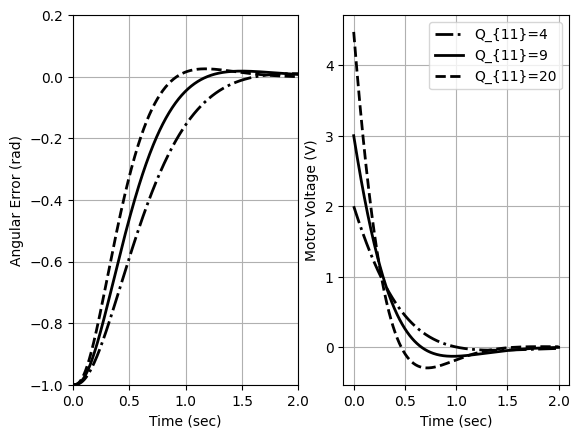

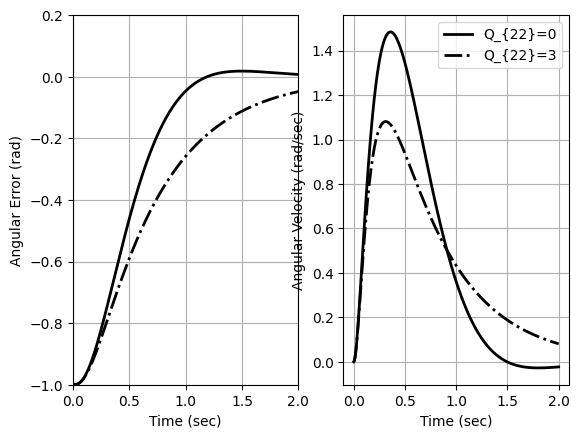

In [3]:
import numpy as np
from scipy.linalg import solve_continuous_are
from scipy.signal import StateSpace, lsim
import matplotlib.pyplot as plt

def lqr(A, B, Q, R):
    # Solve Riccati equation
    X = solve_continuous_are(A, B, Q, R)
    # Compute LQR gain
    K = np.linalg.inv(R) @ B.T @ X
    return K

# System matrices
A = np.array([[0, 1, 0], [0, 0, 4.438], [0, -12, -24]])
B = np.array([[0], [0], [20]])
C = np.array([[1, 0, 0]])
D = np.array([[0]])
x0 = np.array([[-1], [0], [0]])

R = np.array([[1]])

# Different Q matrices
Q1 = np.diag([4, 0, 0])
Q2 = np.diag([9, 0, 0])
Q3 = np.diag([20, 0, 0])
Q4 = np.diag([9, 3, 0])

# LQR gains
K1 = lqr(A, B, Q1, R)
K2 = lqr(A, B, Q2, R)
K3 = lqr(A, B, Q3, R)
K4 = lqr(A, B, Q4, R)

# Closed-loop systems
Acl1 = A - B @ K1
Acl2 = A - B @ K2
Acl3 = A - B @ K3
Acl4 = A - B @ K4

# Create state-space systems
sys1 = StateSpace(Acl1, B, C, D)
sys2 = StateSpace(Acl2, B, C, D)
sys3 = StateSpace(Acl3, B, C, D)
sys4 = StateSpace(Acl4, B, C, D)

# Time vector
t = np.linspace(0, 2, 500)

# Initial response
t1, y1, x1 = lsim(sys1, U=0, T=t, X0=x0.flatten())
t2, y2, x2 = lsim(sys2, U=0, T=t, X0=x0.flatten())
t3, y3, x3 = lsim(sys3, U=0, T=t, X0=x0.flatten())
t4, y4, x4 = lsim(sys4, U=0, T=t, X0=x0.flatten())

# Control inputs
u1 = -K1 @ x1.T
u2 = -K2 @ x2.T
u3 = -K3 @ x3.T
u4 = -K4 @ x4.T

print('K1: ')
print(K1)
print('K2: ')
print(K2)
print('K3: ')
print(K3)
print('K4: ')
print(K4)

# Plotting
plt.figure(1)
plt.subplot(121)
plt.plot(t1, y1, 'k-.', t2, y2, 'k', t3, y3, 'k--', linewidth=2)
plt.grid()
plt.axis([0, 2, -1, 0.2])
plt.xlabel('Time (sec)')
plt.ylabel('Angular Error (rad)')

plt.subplot(122)
plt.plot(t1, u1.T, 'k-.', t2, u2.T, 'k', t3, u3.T, 'k--', linewidth=2)
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Motor Voltage (V)')
plt.legend(['Q_{11}=4', 'Q_{11}=9', 'Q_{11}=20'], loc='best')

plt.figure(2)
plt.subplot(121)
plt.plot(t2, y2, 'k', t4, y4, 'k-.', linewidth=2)
plt.grid()
plt.axis([0, 2, -1, 0.2])
plt.xlabel('Time (sec)')
plt.ylabel('Angular Error (rad)')

plt.subplot(122)
plt.plot(t2, x2[:, 1], 'k', t4, x4[:, 1], 'k-.', linewidth=2)
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Angular Velocity (rad/sec)')
plt.legend(['Q_{22}=0', 'Q_{22}=3'], loc='best')

plt.show()
